<a href="https://colab.research.google.com/github/saratkv/HandsOn_Unsupervised_Learning_with_Python/blob/master/chapter02/vq_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

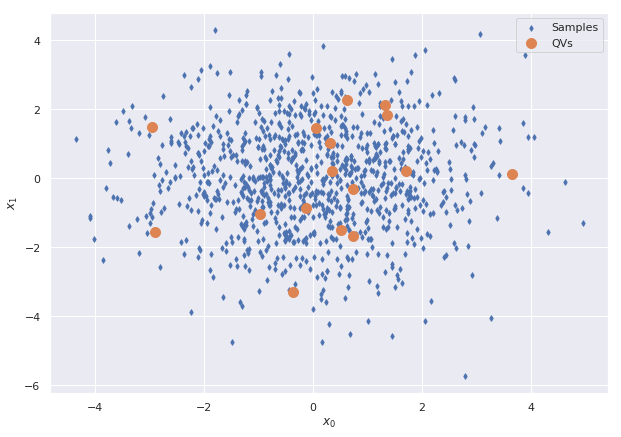

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

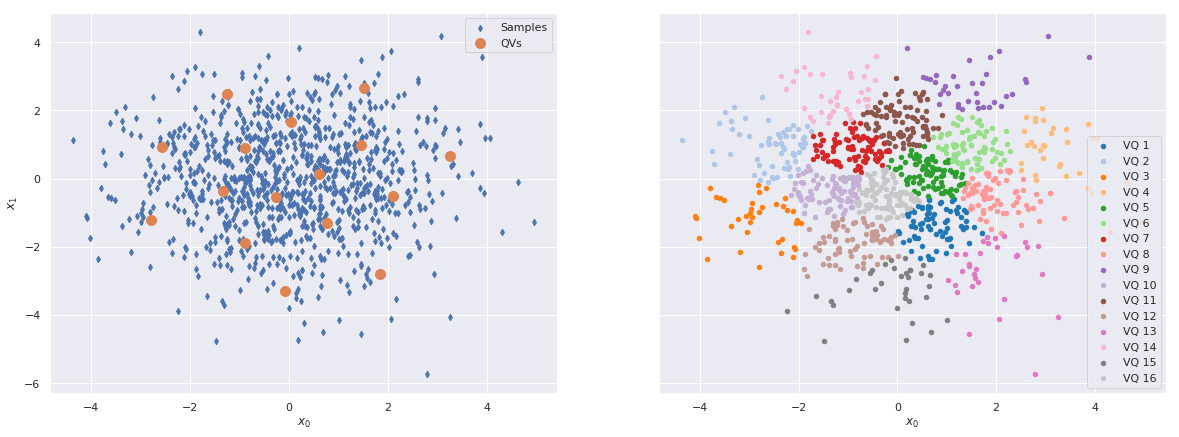

In [7]:
import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist


# For reproducibility
np.random.seed(1000)


nb_samples = 1000
n_vectors = 16
delta = 0.05
n_iterations = 1000


if __name__ == '__main__':
    # Initialize the dataset and the vectors
    data = np.random.normal(0.0, 1.5, size=(nb_samples, 2))
    qv = np.random.normal(0.0, 1.5, size=(n_vectors, 2))

    # Show the initial configuration
    sns.set()

    fig, ax = plt.subplots(figsize=(10, 7))

    ax.scatter(data[:, 0], data[:, 1], marker='d', s=15, label='Samples')
    ax.scatter(qv[:, 0], qv[:, 1], s=100, label='QVs')
    ax.set_xlabel(r'$x_0$')
    ax.set_ylabel(r'$x_1$')
    ax.legend()

    plt.show()

    # Perform the computation
    for i in range(n_iterations):
        for p in data:
            distances = cdist(qv, np.expand_dims(p, axis=0))
            qvi = np.argmin(distances)
            alpha = p - qv[qvi]
            qv[qvi] += (delta * alpha)

    distances = cdist(data, qv)
    Y_qv = np.argmin(distances, axis=1)

    # Show the final configuration
    fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

    ax[0].scatter(data[:, 0], data[:, 1], marker='d', s=20, label='Samples')
    ax[0].scatter(qv[:, 0], qv[:, 1], s=100, label='QVs')
    ax[0].set_xlabel(r'$x_0$')
    ax[0].set_ylabel(r'$x_1$')
    ax[0].legend()

    for i in range(n_vectors):
        ax[1].scatter(data[Y_qv == i, 0], data[Y_qv == i, 1], marker='o', s=20, c=cm.tab20(i),
                      label='VQ {}'.format(i + 1))
    ax[1].set_xlabel(r'$x_0$')
    ax[1].legend()

    plt.show()
    